## Unsupervised learning example

In this example we will use the `iris dataset` ([link to the dataset card](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)).

This dataset is already included in the sklearn library, so we do not need to do any preprocessing.

We train a classifier in an unsupervised fashion using the K-means clustering model.

Import the data

In [1]:
from sklearn import datasets
 
# Import the dataset
iris = datasets.load_iris()

Let us have a look at the shape of the dataset.

In [2]:
n_data_points = len(iris['data'])
n_features = len(iris['feature_names'])
feature_names = iris['feature_names']
targets = iris['target_names']
print(f'The dataset has {n_data_points} datapoints')
print(f'The data has {n_features} features, they are {feature_names}')
print(f'The data can have targets {targets}')

The dataset has 150 datapoints
The data has 4 features, they are ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The data can have targets ['setosa' 'versicolor' 'virginica']


Consider only two features (sepal length and sepal width), so that we can plot the datapoints in the plane.

In [3]:
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

Let us divide into training and testing.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

KMeans is an unsupervised learning algorithm, which means that it can be applied to data which is unlabelled. In our case (for the iris dataset) we have labels, and we know that each datapoint belongs to one of three classes. However, in a usual application of unsupervised learning we would not know that, so part of the process is figuring out how many clusters are best for our task. 

The way that KMeans achieves this is as follows. Given a number of clusters $N$ the algorithm tries to divide the dataset in $N$ clusters such that they minimise a quantity called inertia. This intuitively measures how cohesive each cluster is.

There are different ways of choosing the number of clusters: one such method is the [ELBOW method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)), which finds a good trade-off between number of clusters and inertia. 

Let's fit different KMeans models for different number of clusters and compute their inertia. Then let's plot one against the other to figure out how many clusters we need.

Text(0, 0.5, 'Inertia')

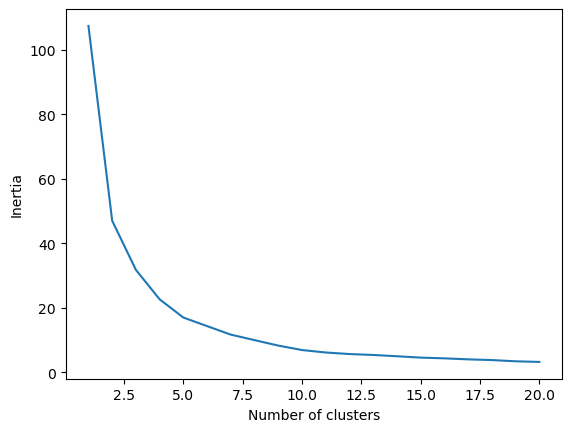

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

N_clusters = range(1,21)
inertias = []

for N in N_clusters:
    # Define model
    clf = KMeans(n_clusters=N)

    # Fit the model
    clf.fit(X_train)

    # Compute and store the inertia
    inertias.append(clf.inertia_)

# Plot number of clusters against inertia
plt.plot(N_clusters, inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

As many things in machine learning this is more of a heuristic than a precise method. In fact it is hard to see from the graph above why 3 clusters should be the correct answer! Nevertheless, since we know we have three clusters, let's carry out with $N=3$.

Let us fit the KMeans model.

In [18]:
clf = KMeans(n_clusters=3)
clf.fit(X_train)

KMeans(n_clusters=3)

Note that this is not a supervised method, so calculating accuracy makes less sense than when we looked at the SVM. Instead, we plot the areas that are divided into clusters by the KMeans model and compare it to our labels.

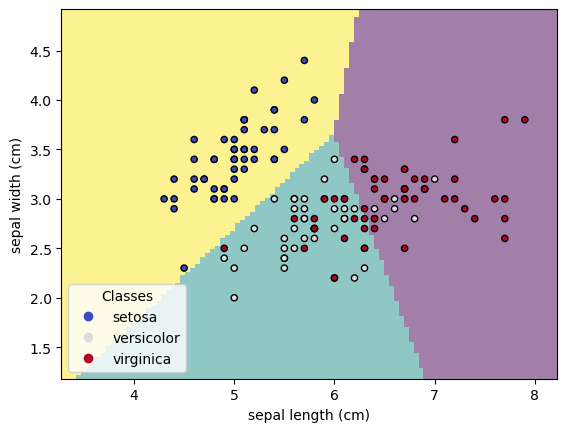

In [19]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]


clf.fit(X_train)
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_test,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    shading="auto",
    alpha=0.5,
    ax=ax,
)
scatter = ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
disp.ax_.legend(
    scatter.legend_elements()[0],
    iris.target_names,
    loc="lower left",
    title="Classes",
)

plt.show()

### Things to try
- What would the final plot look like for different number of clusters?
- There are different metrics for clustering (e.g. silhouette score). Read about them [here](https://scikit-learn.org/1.5/modules/clustering.html#clustering-evaluation) and choose one to evaluate the final model on.
- We have used the first two columns of the dataset. What happens if we use the last two? Or any other two?